# 13wk-56: 타이타닉 / 자료분석(Autogluon)

최규빈  
2023-12-01

# 1. 강의영상

<https://youtu.be/playlist?list=PLQqh36zP38-wSwTv3JMCCT4pDIMyQECOj&si=AnH-0UWe4goHqLLY>

# 2. Imports

In [4]:
#!pip install autogluon.eda

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
#---#
from autogluon.tabular import TabularPredictor
import autogluon.eda.auto as auto
#---#
import warnings
warnings.filterwarnings('ignore')

# 3. Data

In [6]:
!kaggle competitions download -c titanic

2023-12-01 21:25:57,259 WARNING Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7f0fa4f850f0>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution')': /api/v1/competitions/data/download-all/titanic
  0%|                                               | 0.00/34.1k [00:00<?, ?B/s]
100%|███████████████████████████████████████| 34.1k/34.1k [00:00<00:00, 752kB/s]

In [7]:
!unzip titanic.zip

Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               

In [8]:
df_train = pd.read_csv('train.csv')

In [9]:
!rm gender_submission.csv
!rm test.csv
!rm train.csv
!rm titanic.zip

# 4. 적합

In [10]:
df_train.head()

In [11]:
# step1 -- pass
# step2 
predictr = TabularPredictor(label = 'Survived')
# step3 
predictr.fit(df_train,num_gpus=1)
# step4 
yhat = predictr.predict(df_train)

No path specified. Models will be saved in: "AutogluonModels/ag-20231201_122610/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20231201_122610/"
AutoGluon Version:  0.8.2
Python Version:     3.10.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #26~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Thu Jul 13 16:27:29 UTC 2
Disk Space Avail:   248.16 GB / 490.57 GB (50.6%)
Train Data Rows:    891
Train Data Columns: 11
Label Column: Survived
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
    2 unique label values:  [0, 1]
    If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatur

# 5. 해석 및 시각화

## A. y의 분포, (X,y)의 관계 시각화

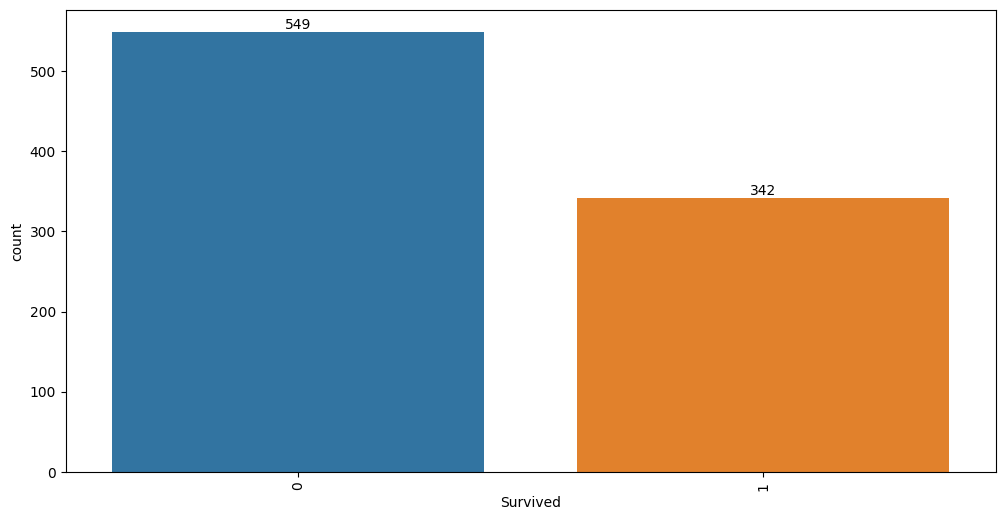

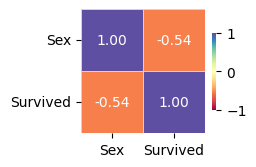

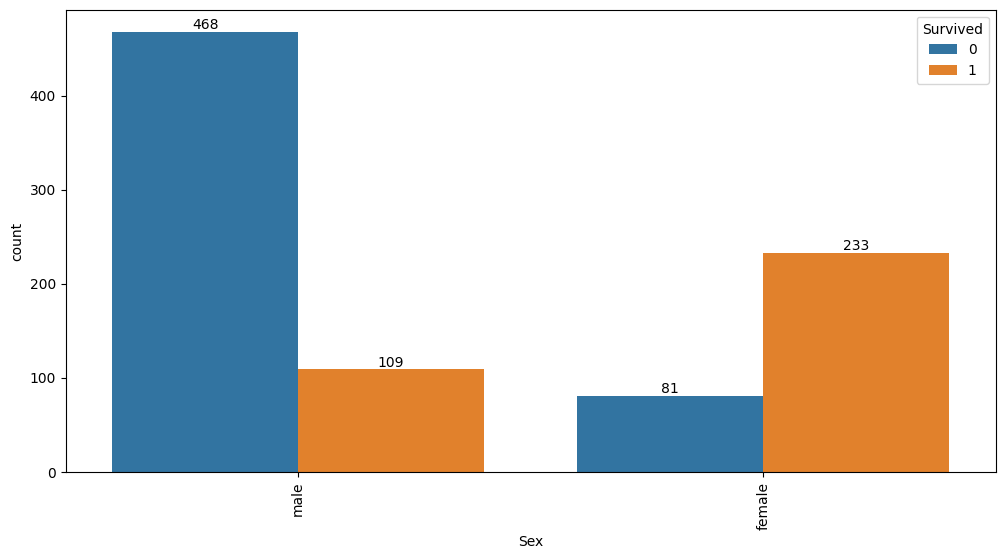

In [12]:
auto.target_analysis(
    train_data=df_train,
    label='Survived',
    fit_distributions=False
)

## B. 중요한 설명변수

No path specified. Models will be saved in: "AutogluonModels/ag-20231201_122621/"

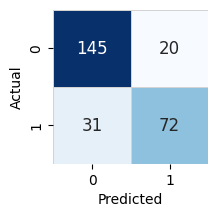

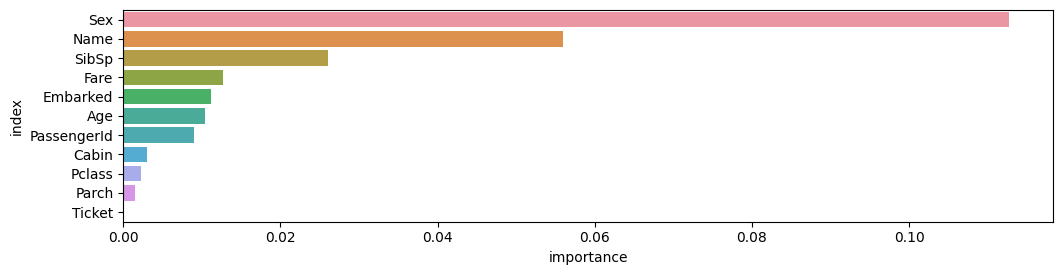

In [13]:
auto.quick_fit(
    train_data=df_train,
    label='Survived',
    show_feature_importance_barplots=True
)

## C. 관측치별 해석

`-` 1번관측치

In [14]:
df_train.iloc[[1]]

In [15]:
predictr.predict(df_train.iloc[[1]])

In [16]:
predictr.predict_proba(df_train.iloc[[1]])

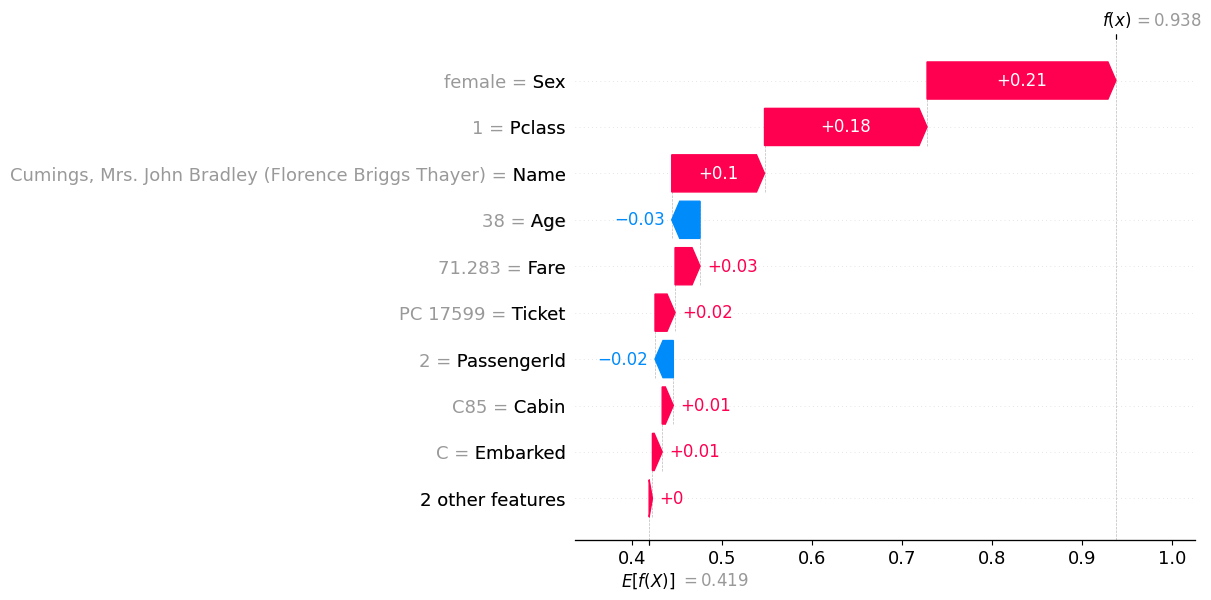

In [17]:
auto.explain_rows(
    train_data=df_train,
    model=predictr,
    rows=df_train.iloc[[1]],
    display_rows=True,
    plot='waterfall'
)

-   이름이 중요하다..?

`-` 이름을 남자처럼 바꿔보자.

> **Note**
>
> “Cumings, Mrs. John Bradley (Florence Briggs Thayer)”라는 이름은
> 일반적인 형식의 성명이 아닌, 이전 시대에 흔히 사용되던 형식 중
> 하나입니다. 이러한 형식은 주로 19세기와 20세기 초기에 미국과 다른 서구
> 국가에서 흔히 사용되었습니다.
>
> 이 이름의 구성 요소를 설명하면 다음과 같습니다:
>
> 1.  Cumings: 이것은 가족 성입니다. 여성의 경우 결혼 전 성을 나타낼 수
>     있습니다.
>
> 2.  Mrs. John Bradley: 이 부분은 여성의 남편의 이름과 “Mrs.”라는
>     여성으로서의 결혼 상태를 나타내는 부분입니다. “Mrs.”는 결혼한
>     여성을 가리키며, “John Bradley”는 그녀의 남편의 이름입니다.
>
> 3.  Florence Briggs Thayer: 이것은 여성의 본래 이름 또는 결혼 전
>     이름입니다. 종종 이러한 형식의 이름에서는 여성의 결혼 전 이름을
>     괄호로 감싸서 표시합니다.
>
> 즉, “Cumings, Mrs. John Bradley (Florence Briggs Thayer)”는 Florence
> Briggs Thayer라는 여성이 John Bradley Cumings와 결혼하여 Mrs. John
> Bradley Cumings로서의 결혼 상태를 나타내는 방식으로 표시된 이름입니다.
> 이러한 형식은 오늘날에는 더 이상 널리 사용되지 않으며, 대부분의 경우
> 현재는 결혼 후에도 자신의 본래 성과 이름을 유지하는 것이 일반적입니다.

In [46]:
onerow = df_train.iloc[[1]].copy()
onerow['Name'] = 'Cumings, Mr. John Bradley'

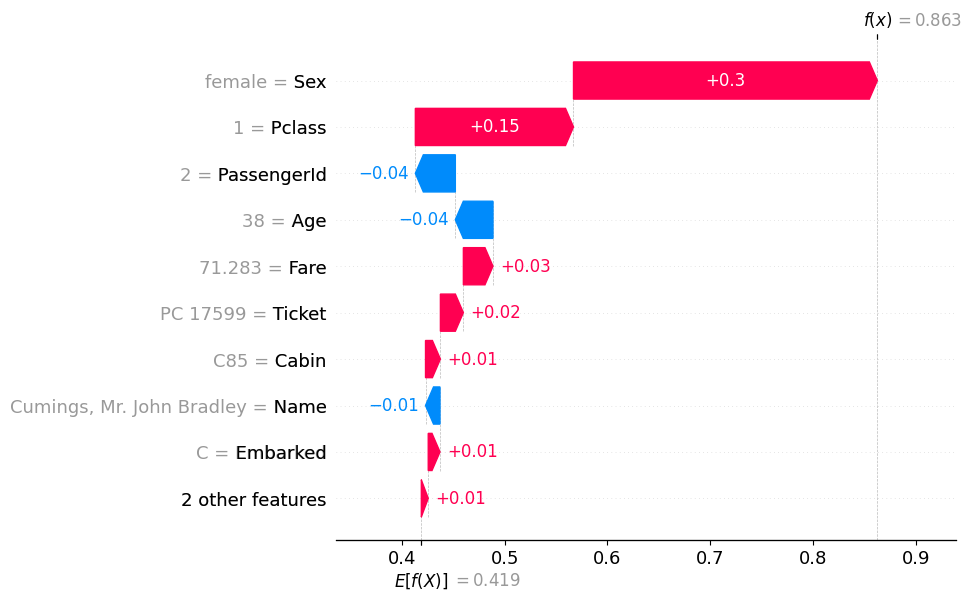

In [47]:
auto.explain_rows(
    train_data=df_train,
    model=predictr,
    rows=onerow,
    display_rows=True,
    plot='waterfall'
)

-   이름이 남자…